# Toxic Comment Classification Challenge

"Toxic Comment Classification Challenge"는 캐글에서 진행한 경연으로, 위키피디아 토론 페이지에 있는 유해한 댓글들을 가려내는 것을 목표로 합니다. 이 프로젝트의 목표는 케라스의 딥러닝 모듈을 이용해서 캐글에서 좋은 성적을 거두는 것입니다. 자세한 설명은 다음 링크에서 볼 수 있습니다.
https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge 여기서는 좋은 모델을 만들기 전 단계로서, '일단 작동하기는 하는' 간단한 모델을 만들어볼 것입니다. 



# 데이터 파악하기

In [172]:
import pandas as pd

# 이 단계에서는 테스트 데이터만 활용할 것입니다.
train_data = pd.read_csv('train.csv')
train_data.head(7)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0


위에서 보다시피 각각의 코멘트는 6가지 범주에 속할 수 있습니다(toxic,	severe_toxic,	obscene,	threat,	insult,	identity_hate). 하나의 코멘트는 여러 범주에 동시에 속할 수 있으며, 해당 범주에 속하면 1, 그렇지 않으면 0입니다. 다음은 각 범주가 전체 데이터에서 차지하는 비중을 나타냅니다.

In [0]:
classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train_data[classes].sum() / len(train_data)

toxic            0.095867
severe_toxic     0.009980
obscene          0.052751
threat           0.003165
insult           0.049062
identity_hate    0.008703
dtype: float64

# 문자열 데이터 토큰화

In [0]:
# 토큰화를 하기 전에 훈련 셋과 검증 셋을 나눕니다. 훈련 셋만을 가지고 토큰화를 한 다음, 이를 검증 셋에 적용해야 합니다.
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(train_data, test_size=0.2, shuffle=True, random_state=42)

케라스의 Tokenizer를 이용하면 문자열 데이터를 쉽게 토큰화할 수 있습니다. 문자열에 섞인 기호 문자(%, & 등)나 무엇을 하나의 단어로 파악할지 등을 설정할 수 있습니다. 
https://keras.io/preprocessing/text/

In [0]:
from keras.preprocessing.text import Tokenizer

max_words = 10000 

# train_data를 보고 빈도수가 가장 높은 단어순으로 자연수를 배정합니다. 
tokenizer = Tokenizer(num_words=max_words)   # num_words의 역할은 뒤에 나옵니다.
tokenizer.fit_on_texts(train_data['comment_text'])

가장 많이 쓰인 단어(the)부터 순서대로 자연수가 배정되었습니다. 

In [198]:
word_index = tokenizer.word_index
print("찾아낸 단어의 개수:", len(word_index))
print('빈도수가 높은 10개 단어에 배정된 수(0은 포함하지 않음):\n', dict([(key, value) for key, value in word_index.items()][:10]))

찾아낸 단어의 개수: 183197
빈도수가 높은 10개 단어에 배정된 수(0은 포함하지 않음):
 {'the': 1, 'to': 2, 'of': 3, 'and': 4, 'a': 5, 'you': 6, 'i': 7, 'is': 8, 'that': 9, 'in': 10}


단어마다 자연수를 배정한 것을 기반으로 각각의 코멘트(문자열)를 수의 나열로 바꿀 수 있습니다. 다음 코드는 코멘트를 수와 매핑해 리스트로 반환합니다.

In [0]:
sequences = tokenizer.texts_to_sequences(train_data['comment_text'])
val_sequences = tokenizer.texts_to_sequences(val_data['comment_text'])

In [239]:
np.array(sequences)

array([list([8296, 56, 3980, 10, 4414, 8296, 8, 4414, 7, 398, 8296, 871, 1369, 184, 2, 866, 1697, 2609, 1738, 1336]),
       list([679, 85, 812, 180, 11, 46, 16, 7666, 22, 6, 86, 2, 1499, 2, 90, 5, 987, 3, 1, 588, 3813, 7765, 4, 83, 41, 46, 16, 47, 3362, 2, 2877, 390, 6, 99, 5, 764, 339, 8510, 87, 14, 18, 5, 98, 868, 25, 14, 4, 7, 46, 83, 243, 1, 1421, 362, 17, 1051, 114, 2299, 73, 2, 72, 144, 80, 107, 17, 103, 26, 50, 426, 6, 18, 2, 16, 57, 1716, 10, 9320, 9, 280, 158, 20, 125, 4, 9, 664, 8, 548, 1280]),
       list([1, 5860, 3, 13, 136, 8, 7433, 282, 6525, 172, 17, 3233, 993, 1, 123, 15, 6843, 728, 8, 1550, 5, 11, 5329, 4, 3981, 2903, 15, 790, 1, 1550, 2121, 9, 61, 2470, 7667, 8965, 87, 14, 3538, 4, 25, 7364, 2171, 628, 11, 5329, 4, 3981, 2903, 15, 1, 5629, 3, 1076, 790, 1, 1550, 2121, 9, 13, 8, 1, 434, 77, 6843, 537, 15, 2171, 171, 1, 136, 8, 14, 90, 1121, 5, 47, 850, 8, 90, 129, 2, 2487, 4, 2297, 30, 1071, 1799, 3, 5860, 628, 367, 4, 505, 2632, 773, 107, 17, 1, 994, 353, 3, 2171, 1

참고로 이때 처음 Tokenizer 인스턴스를 만들 때 지정해두었던 num_words가 역할을 발휘합니다. 예를 들어, 단어 'maintains'는 10000으로 배정되었습니다. 4373번째 코멘트에서  'maintains'란 단어를 쓰고 있으므로, 4373번째 코멘트를 자연수의 나열로 바꾸어주면 그곳에는 10000이 포함되어 있어야 할 것 같습니다.

In [267]:
print("'maintains'에 배정된 수: ", word_index['maintains'])
print("'maintains'란 단어가 들어간 4373번째 코멘트: \n", train_data.iloc[4373,1])

'maintains'에 배정된 수:  10000
'maintains'란 단어가 들어간 4373번째 코멘트: 
 July 2006 (UTC)

Does anyone have any suggestions for rewording that still maintains the content and spirit of the referenced article?  19:10, 27


그러나 sequences에는 10000이 포함되어 있지 않습니다.

In [270]:
print(sequences[4373])

[826, 526, 180, 103, 257, 18, 54, 1436, 12, 9536, 9, 159, 1, 176, 4, 2429, 3, 1, 1218, 23, 795, 438, 978]


sequences[4373]를 디코딩해보면, 'maintains'란 단어가 사라진 것을 확인할 수 있습니다. 다시 말해, num_words 파라미터는 우리가 분석에 사용할 단어의 개수를 지정해줍니다. 위에서 num_words을 10000으로 지정해주었기 때문에, 빈도수가 높은 9999개의 단어를 자연수로 매핑해줍니다. 곧 보겠지만 0에는 다른 역할이 있습니다. 0을 포함하여 모든 코멘트를 0~9999 사이의 정수의 배열로 만들어줄 것입니다.

In [268]:
sentence4373 = []
for i in sequences[4373]:
  sentence4373.append(dict([(value, key) for key, value in word_index.items()])[i])
sentence4373

['july',
 '2006',
 'utc',
 'does',
 'anyone',
 'have',
 'any',
 'suggestions',
 'for',
 'rewording',
 'that',
 'still',
 'the',
 'content',
 'and',
 'spirit',
 'of',
 'the',
 'referenced',
 'article',
 '19',
 '10',
 '27']

위에서는 코멘트마다 단어의 개수가 달랐습니다. 모델에 입력으로 넣기 위해서는 크기가 (코멘트 개수, 단어의 개수)인 넘파이 배열의 형태로 만들어줘야 합니다. 이를 위해 단어의 개수를 100개로 제한하고, 개수가 100개보다 적은 코멘트에 대해서는 0으로 패딩해줍니다.


In [223]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
X_train = pad_sequences(sequences, maxlen=maxlen)
X_val = pad_sequences(val_sequences, maxlen=maxlen)
X_train.shape # 127656개의 코멘트를 100개의 정수 나열로 매핑한 넘파이 배열입니다. 100개의 정수는 0~9999 사이의 값을 가집니다.

(127656, 100)

In [222]:
# 예를 들어 첫 번째 코멘트는 단어의 개수가 적어서 0으로 패딩된 걸 볼 수 있습니다.
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 8296,   56, 3980,   10, 4414, 8296,    8, 4414,
          7,  398, 8296,  871, 1369,  184,    2,  866, 1697, 2609, 1738,
       1336], dtype=int32)

이제 레이블 또한 넘파이 배열로 만들어줍니다. 그러면 이제 준비는 끝났습니다.

In [209]:
classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

y_train = np.asarray(train_data[classes])
y_val = np.asarray(val_data[classes])
print(X_train.shape) # 시퀀스 데이터 크기
print(y_train.shape) # 라벨 데이터 크기
print(X_val.shape) 
print(y_val.shape)

(127656, 100)
(127656, 6)
(31915, 100)
(31915, 6)


# 모델 만들기

우리의 최종 목표는 어떤 코멘트가 주어졌을 때, 그 코멘트가 속하는 모든 범주들을 찾는 것이었습니다. 그러나 여기서는 어떤 코멘트가 6개 범주 중 **어느 하나라도** 속하는지를 판별하는 이진 분류기를 만들어서 토큰화가 잘 되었는지를 테스트해보겠습니다.

In [0]:
# 6개 범주 중 어느 하나라도 속하면 True 값을 가지는 넘파이 배열을 만듭니다.
y_train_toxic = y_train.sum(axis=1)>=1
y_val_toxic = y_val.sum(axis=1)>=1

In [342]:
# 타겟 레이블은 전체의 약 10%밖에 차지하지 않습니다. 그러므로 우리가 만들 간단한 모델은 일단 정확도 90%는 넘겨야 합니다.
y_val_toxic.sum() / len(y_val_toxic)

0.10164499451668495

임베딩 층과 밀집연결 층을 하나씩 쌓은 간단한 모델을 만듭니다. 이 간단한 모델은 이후에 만들 모델의 성능을 측정할 하나의 기준점 역할을 할 수도 있습니다.

In [0]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Embedding(max_words, 1, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

참고로 임베딩 층의 파라미터 개수는 (max_words x 1) = 10000개입니다. 임베딩 층은 하나의 단어에 하나의 실수 벡터를 매핑해주는 역할을 합니다. 예를 들어, 'the'라는 단어는 우리의 예에서 자연수 1에 해당하며, 이것이 임베딩 층에 와서는 (0.2, 0.4, -0.8, 1.5) 따위의 벡터로 변환되는 것입니다. 이때 벡터의 원소인 0.2, 0.4 등의 값은 임베딩 층의 파라미터 값으로서, 데이터로부터 훈련되어 결정되는 값입니다. 하나의 단어를 몇 차원 벡터로 변환할지는 우리가 직접 결정할 수 있습니다. 여기서는 하나의 단어가 하나의 실수로 표현되도록 설정했습니다. 그러면 유해한 코멘트에 많이 들어가는 단어인지의 여부가 하나의 직선 위에서 표현될 수 있습니다.

In [341]:
history = model.fit(X_train, y_train_toxic, epochs=15, batch_size=256, validation_data=(X_val, y_val_toxic))

Train on 127656 samples, validate on 31915 samples
Epoch 1/15
127656/127656 [==============================] - 3s 26us/step - loss: 0.3481 - acc: 0.8944 - val_loss: 0.2619 - val_acc: 0.8998
Epoch 2/15
127656/127656 [==============================] - 2s 19us/step - loss: 0.2227 - acc: 0.9114 - val_loss: 0.1999 - val_acc: 0.9234
Epoch 3/15
127656/127656 [==============================] - 2s 20us/step - loss: 0.1788 - acc: 0.9328 - val_loss: 0.1756 - val_acc: 0.9350
Epoch 4/15
127656/127656 [==============================] - 3s 20us/step - loss: 0.1595 - acc: 0.9411 - val_loss: 0.1639 - val_acc: 0.9397
Epoch 5/15
127656/127656 [==============================] - 2s 20us/step - loss: 0.1488 - acc: 0.9459 - val_loss: 0.1573 - val_acc: 0.9435
Epoch 6/15
127656/127656 [==============================] - 2s 19us/step - loss: 0.1424 - acc: 0.9488 - val_loss: 0.1537 - val_acc: 0.9457
Epoch 7/15
127656/127656 [==============================] - 3s 20us/step - loss: 0.1384 - acc: 0.9508 - val_loss: 0

검증 셋의 정확도가 95%가 넘었습니다. 이것이 우연인지 아닌지 보기 위해서, 이번에는 임베딩 층이 각 단어에 어떤 실수를 배정했는지를 살펴보겠습니다. 

In [344]:
word_weights = model.get_weights()[0]
word_weights_dict = {}
for word, num in word_index.items():
  if num < 10000:
    word_weights_dict[word] = float(word_weights[num])
    
reversed_word_weights_dict = dict((value, key) for (key, value) in word_weights_dict.items())
for i in sorted(reversed_word_weights_dict, reverse=True)[:10]:
  print(i, reversed_word_weights_dict[i])

4.417933464050293 fuck
4.083502292633057 fucking
3.3335156440734863 shit
3.1934571266174316 idiot
3.0418620109558105 suck
3.0102286338806152 stupid
2.9640443325042725 ass
2.9138338565826416 bitch
2.883837938308716 asshole
2.560756206512451 faggot


높은 실수를 배정한 단어순으로 정렬해서 살펴본 결과, 안 좋은 단어들에 높은 실수를 배정한 걸 알 수 있습니다! (경우에 따라 마이너스 값을 배정할 수도 있습니다) 이는 임베딩 층이 각 단어에 실수를 배정할 때 유해한 코멘트를 잘 걸러낼 수 있도록 특징적인 값을 배정했기 때문입니다. 마지막으로 정확도와 손실 값을 그래프로 그려보겠습니다.

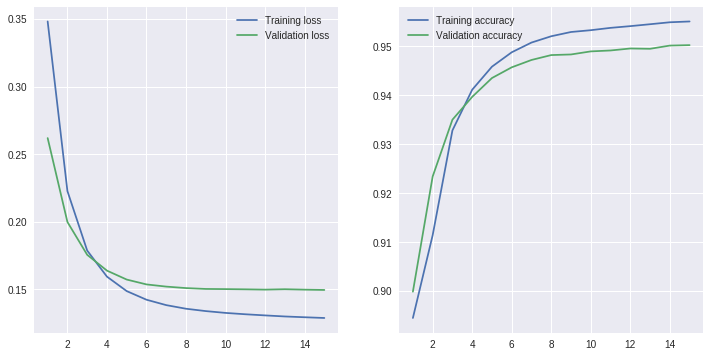

In [345]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = 15

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(range(1, epochs+1), loss, label='Training loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation loss')
plt.legend()

plt.subplot(122)
plt.plot(range(1, epochs+1), acc, label='Training accuracy')
plt.plot(range(1, epochs+1), val_acc, label='Validation accuracy')
plt.legend()
plt.show()